#1. Linear Regression with Gradient Descent


You are required to pre-process given datasets.
Airfare and demand: http://www.stat.ufl.edu/ winner/data/airq402.dat [1] 

Wine Quality: http://archive.ics.uci.edu/ml/datasets/Wine+Quality [2] 

To do: 

1. convert any non-numeric values to numeric values. For example you can replace a country name with an integer value or more appropriately use hot-one encoding. [Hint: use hashmap (dict) or pandas.get dummies]. Please explain your solution.


2. If required drop out the rows with missing values or NA. In next lectures we will handle sparse data, which will allow us to use records with missing values.


3. Split the data into a train(80%) and test(20%) 

These tasks will be carried out in the following manner: 

- Data Prepocessing, where we are going to load the datasets and pre-process the datasets.

- Implement functions for Gradient Descent for the following:
    - Gradient Descent with fixed step length
    - Gradient Descent with Armijo Step length
    - Gradient Descent with Bold Driver Step length
 
- Experiments
- Evaluations

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#loading datasets
#1. airfare dataset
path = "/content/drive/My Drive/airq402.dat"
airfare_dt = pd.read_csv(path, names=['City1','City2','Average Fare','Distance','Average Weekly Passengers','Market Leading Airline',
                                                      'Market Share LA','Average Fare_','Low Price Airline',
                                                      'Market Share LPA','Price'], sep=r'\s+', parse_dates=True)

airfare_dt.head()


,City1,City2,Average Fare,Distance,Average Weekly Passengers,Market Leading Airline,Market Share LA,Average Fare_,Low Price Airline,Market Share LPA,Price
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42


In [ ]:
#2. White wine quality dataset
path_ww = "/content/drive/My Drive/winequality-white.csv"
white_wine_df = pd.read_csv(path_ww, header=0, parse_dates=True, sep=';')

white_wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
#3. Red wine quality dataset
path_rw = "/content/drive/My Drive/winequality-red.csv"
red_wine_df = pd.read_csv(path_rw, header=0, parse_dates=True, sep=';')

red_wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Encoding non-numeric values

Notice that the Airline datasets contains some columns with non-numeric values such as City1, City2, Market Leading Airline and Low Price Airline.

In order to learn a linear regression on the dataset, we need to conver the non-numeric values to numeric values. Thus, we have used pandas.get_dummies  to represents these non-numeric columns. 


The dummy columns will have values 0 and 1 with the value 1 representing that the row has this value. That is, for example, taking the column City1, pandas.get_dummies is going to create a column for each of the distinct values in the column City1.

A given row will have 1 only in the column which corresponds to it's value for city. That is, if a row has City1 as 'CAK', this row will have 1 only in the dummy column for CAK and 0 for all the other columns.

In [ ]:
#getting dummies
airfare_dt = pd.get_dummies(airfare_dt)
airfare_dt.head()

,Average Fare,Distance,Average Weekly Passengers,Market Share LA,Average Fare_,Market Share LPA,Price,City1_ABQ,City1_ACY,City1_ALB,City1_AMA,City1_ATL,City1_AUS,City1_BDL,City1_BHM,City1_BNA,City1_BOI,City1_BOS,City1_BTV,City1_BUF,City1_BUR,City1_BWI,City1_CAE,City1_CAK,City1_CHS,City1_CLE,City1_CLT,City1_CMH,City1_COS,City1_CRP,City1_CVG,City1_DAY,City1_DEN,City1_DFW,City1_DSM,City1_DTW,City1_ELP,City1_EUG,City1_FLL,City1_FNT,...,City2_SYR,City2_TLH,City2_TPA,City2_TUL,City2_TUS,Market Leading Airline_AA,Market Leading Airline_AS,Market Leading Airline_B6,Market Leading Airline_CO,Market Leading Airline_DL,Market Leading Airline_F9,Market Leading Airline_FL,Market Leading Airline_G4,Market Leading Airline_HP,Market Leading Airline_NK,Market Leading Airline_NW,Market Leading Airline_TZ,Market Leading Airline_UA,Market Leading Airline_US,Market Leading Airline_WN,Market Leading Airline_YX,Low Price Airline_AA,Low Price Airline_AQ,Low Price Airline_AS,Low Price Airline_AX,Low Price Airline_B6,Low Price Airline_CO,Low Price Airline_DL,Low Price Airline_F9,Low Price Airline_FL,Low Price Airline_G4,Low Price Airline_HP,Low Price Airline_NK,Low Price Airline_NW,Low Price Airline_SY,Low Price Airline_TZ,Low Price Airline_UA,Low Price Airline_US,Low Price Airline_WN,Low Price Airline_YX
0,114.47,528,424.56,70.19,111.03,70.19,111.03,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,122.47,860,276.84,75.10,123.09,17.23,118.94,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,214.42,852,215.76,78.89,223.98,2.77,167.12,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,69.40,288,606.84,96.97,68.86,96.97,68.86,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,158.13,723,313.04,39.79,161.36,15.34,145.42,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


Airfare dataset initially had 11 columns, after adding the dummy columns, the total number of columns is now 217.


In [ ]:
#split dataset into train (80%) and test (20%)
#train-test split function 
def split_train_test(dataset, size):
  trainSet = dataset.sample(frac=size)
  testSet = dataset.drop(trainSet.index)
  return trainSet, testSet

In [ ]:
#split data
#airline fare dataset
airfare_train, airfare_test = split_train_test(airfare_dt,0.8)

#white wine dataset
white_wine_train, white_wine_test = split_train_test(white_wine_df,0.8)

#red wine dataset
red_wine_train, red_wine_test = split_train_test(red_wine_df,0.8)

## Linear Regression with Gradient Descent


To implement a linear Regression with Gradient Descent, we are going to define the following functions:

- Function to compute our Objective Function, f, denoted as obj_func
- Function to compute the gradient of our obj_func function wrt to beta, denoted as get_gradient
- Function to compute the RMSE of the model, denoted as compute_RMSE
- Function for the gradient descent algorithm, denoted as MINIMIZE_GD
- Function to learn the gradient descent algorithm, denoted as LEARN_LINREG_GD

In [ ]:
#function to compute objective function-->we want to minimize the difference between target values y and predicted values y_pred
def obj_func(x, y, beta):
  residual = y - x.dot(beta)
  residual_transp = np.transpose(residual)
  #compute objective func
  obj_fun = residual_transp.dot(residual_transp)
  return obj_fun

In [ ]:
#function to compute the gradient with respect to beta
def get_gradient(x, y, beta):
  residual = y - x.dot(beta)
  x_transp = np.transpose(x)
  #compute derivative -2.x(y-x.b)
  grad = -2*x_transp.dot(residual)
  return grad


In [ ]:
#function to calculate RMSE
def compute_RMSE(y, y_pred):
  rmse = np.sqrt((((y-y_pred)**2).sum())/ y.shape[0])
  return rmse

The next function impliments the GD algorithm, i.e. minimizes a function through gradient descent. We then need to compute the RMSE on testing dataset on each iterations. And finally compute loss difference on the training dataset on each iterations.



In [ ]:
#minimize objective function through gradient descent
def MINIMIZE_GD_fixed(x_train, y_train, x_test, y_test, b0, alpha, max_iter, epsillon):
  beta = b0
  loss_difference = []
  rmse_variation = []
  prev_beta = beta #this will help us compute rmse diff between previous beta and current beta

  #for however many iterations we have, do:
  for i in range (0,max_iter):
    #compute y_pred on training data based on current beta values
    y_pred_train = np.dot(x_train,beta )
    #compute y_pred on testing data based on current beta values
    y_pred_test = np.dot(x_test,beta)
    #compute rmse on test data for current beta
    rmse = compute_RMSE(y_test, y_pred_test)
    #append to list
    rmse_variation.append(rmse)

    #get loss difference between model with previous beta and current beta
    loss_diff = abs(obj_func(x_train, y_train, prev_beta) 
                    - obj_func(x_train, y_train, beta))
    #append loss to list
    loss_difference.append(loss_diff)

    #check if the model has converged after first iteration 
    if i > 1 and loss_diff <= epsillon:
      print("Model converged in {} iterations".format(i))
      return beta, loss_difference, rmse_variation
    
    else:
      #if model has not converged
      #set beta to prev beta
      prev_beta = beta
      #compute new beta values using the grad function 
      beta = beta - alpha*get_gradient(x_train, y_train, beta)
  #if still not converged 
  if loss_diff > epsillon:
    print("Model did not converge after {} iterations.".format(max_iter))
  return beta, loss_difference, rmse_variation


### Step Length Methods for Gradient Descent

In [ ]:
#1. Step Length by ARMIJO
def armijo_step(x, y, beta, gamma):
  #set alpha to 1
  alpha = 1
  #get grad
  grad = get_gradient(x, y, beta)
  #compute obj func
  fx = obj_func(x,y,beta)

  while (fx - (obj_func((x + alpha*grad), y, beta))) < (alpha * gamma * np.transpose(grad).dot(grad)):
    #while this is true, divide alpha by 2
    alpha = alpha * 0.5
    return alpha


#function to minimize the obj function with GD-armijo-step
#note that In the gradient descent function with Armijo step, alpha is computed in each iterations.
def MINIMIZE_GD_Armijo(x_train, y_train, X_test, y_test, initial_beta, max_iter, epsillon):
  beta = initial_beta
  loss_difference = []
  rmse_variation = []
  prev_beta = beta

  for i in range (0,max_iter):
    #compute y_pred on training data based on current beta
    y_pred_train = (np.dot(x_train, beta))
    #compute y_pred on testing data based on current beta
    y_pred_test = np.dot(X_test, beta)
    #compute the error 
    rmse = compute_RMSE(y_pred_test, y_test)
    #append error
    rmse_variation.append(rmse)

    #find loss difference between obj function with current beta and previous beta
    loss = abs(obj_func(x_train, y_train, beta) - obj_func(x_train, y_train, prev_beta))
    #append loss
    loss_difference.append(loss)

    #check for convergence
    if (i > 0) and (loss <= epsillon):
      print('Model converged in {} iteration'. format(i))
      return beta, loss_difference, rmse_variation
    else: #if not converged yet
      #set beta to previous beta
      prev_beta = beta
      #then apply armijo step length to compute alpha
      alpha = armijo_step(x_train, y_train, beta, 0.1)
      #compute new beta values
      beta = beta - alpha * get_gradient(x_train, y_train, beta)
  
  #if did not converge
  if loss > epsillon:
    print("Model did not converge after {} iterations".format(max_iter))
  
  return beta, loss_difference, rmse_variation


In [ ]:
#2. Step length Bold-driver
def bold_driver_step(x, y, beta, alpha_old, alpha_inc, alpha_dec):
  #get derivatives
  grad = get_gradient(x, y, beta)
  #compute obj func
  fx = obj_func(x, y, beta)
  # compute f(x+ad)
  fx_ad = obj_func((x + alpha_old * grad),y , beta) #x is augmented 
  #update alpha
  alpha = alpha_old * alpha_inc

  while fx - fx_ad <= -0.001:
    alpha *= alpha_dec
    #re-compute obj fun
    fx_ad = obj_func((x + alpha * grad),y,beta)
  return alpha 



#function to minimize the obj function with GD-boldDriver-step
def MINIMIZE_GD_BoldDriver(x_train, y_train, X_test, y_test, initial_beta, max_iter, epsillon):
  beta = initial_beta
  loss_difference = []
  rmse_variation = []
  prev_beta = beta

  for i in range (0,max_iter):
    #compute y_pred on training data based on current beta
    y_pred_train = (np.dot(x_train, beta))
    #compute y_pred on testing data based on current beta
    y_pred_test = np.dot(X_test, beta)
    #compute the error 
    rmse = compute_RMSE(y_pred_test, y_test)
    #append error
    rmse_variation.append(rmse)

    #find loss difference between obj function with current beta and previous beta
    loss = abs(obj_func(x_train, y_train, beta) - obj_func(x_train, y_train, prev_beta))
    #append loss
    loss_difference.append(loss)

    #check for convergence
    if (i>0) and (loss <=epsillon):
      print('Model converged in {} iteration'. format(i))
      return beta, loss_difference, rmse_variation
    else: #if not converged yet
      #set beta to previous beta
      prev_beta = beta
      #then apply armijo step length to compute alpha
      alpha = bold_driver_step(x_train, y_train, beta, 1, 1.1, 0.5)
      #compute new beta values
      beta = beta - alpha * get_gradient(x_train, y_train, beta)
  
  #if did not converge
  if loss > epsillon:
    print("Model did not converge after {} iterations".format(max_iter))
  
  return beta, loss_difference, rmse_variation

## Implimentation 

Function to learn the gradient descent algorithm, denoted as LEARN_LINREG_GD

In [ ]:
def LEARN_LINREG_GD(x_train, y_train, x_test, y_test, alpha, max_iter, epsillon, step):
  #initial beta set to zero 
  initial_beta = np.zeros(x_train.shape[1])

  #use fixed step method
  if step == 1:
    beta, loss_diff, rmse_variation = MINIMIZE_GD_fixed(x_train, y_train, x_test, y_test, initial_beta, alpha, max_iter, epsillon)

  #use armijo step 
  if step == 2:
    beta, loss_diff, rmse_variation = MINIMIZE_GD_Armijo(x_train, y_train, x_test, y_test, initial_beta, max_iter, epsillon)
  
  #use bold-driver step 
  if step == 3: 
    beta, loss_diff, rmse_variation = MINIMIZE_GD_BoldDriver(x_train, y_train, x_test, y_test, initial_beta, max_iter, epsillon)

  return beta, loss_diff, rmse_variation

## Evaluation 

### Airfare Dataset

In [ ]:
#split train and test data
air_train, air_test = split_train_test(airfare_dt, 0.8)

#get features (x) and target (y)
x_air_train = air_train.drop(['Price'], axis=1)
y_air_train = air_train['Price']

x_air_test = air_test.drop(['Price'], axis=1)
y_air_test = air_test['Price']

In [ ]:
#hyperparameters
max_iter= 100
epsillon = 0.5
alpha_1 = 0.000000001
alpha_2 = 0.0000000001
alpha_3 = 0.00000000001

In [ ]:
#Gradient descent with Fixed step 
#using alpha_1
beta_fixed_alpha_1, obj_diff_fixed_alpha_1, rmse_variation_fixed_alpha_1 = LEARN_LINREG_GD(x_air_train, y_air_train, x_air_test, y_air_test, alpha_1, max_iter, epsillon, 1)

Model did not converge after 100 iterations.


In [ ]:
#Gradient descent with Fixed step 
#using alpha_2
beta_fixed_alpha_2, obj_diff_fixed_alpha_2, rmse_variation_fixed_alpha_2 = LEARN_LINREG_GD(x_air_train, y_air_train, x_air_test, y_air_test, alpha_2, max_iter, epsillon, 1)

Model did not converge after 100 iterations.


In [ ]:
#Gradient descent with Fixed step
#using alpha_3 
beta_fixed_alpha_3, obj_diff_fixed_alpha_3, rmse_variation_fixed_alpha_3 = LEARN_LINREG_GD(x_air_train, y_air_train, x_air_test, y_air_test, alpha_3, max_iter, epsillon, 1)

Model did not converge after 100 iterations.


In [ ]:
#Gradient descent with Armijo Step 

beta_armijo, obj_diff_armijo, rmse_variation_armijo = LEARN_LINREG_GD(x_air_train, y_air_train, x_air_test, y_air_test, 1, max_iter, epsillon, 2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


TypeError: ignored

In [ ]:
beta_bdriver, obj_diff_bdriver, rmse_variation_bdriver = LEARN_LINREG_GD(x_air_train, y_air_train, x_air_test, y_air_test, 1, max_iter, epsillon, 3)

Model converged in 2 iteration


### Plot of loss differences 

ValueError: ignored

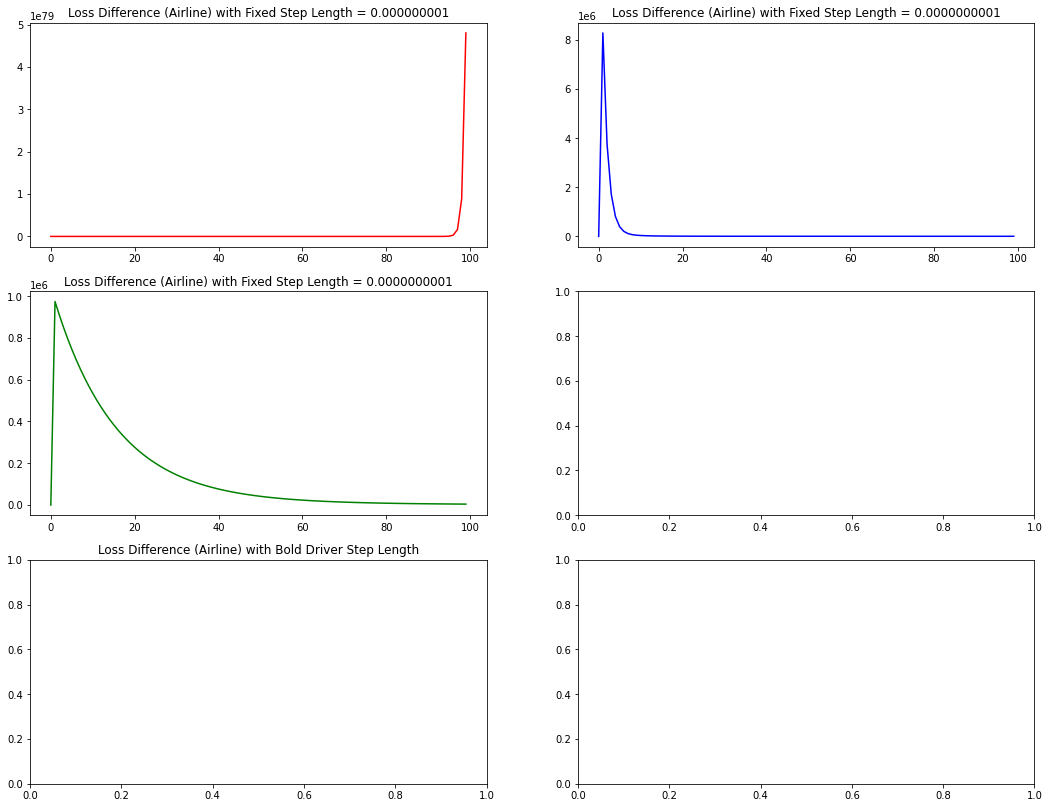

In [ ]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 18
fig_size[1] = 14
plt.rcParams["figure.figsize"] = fig_size

fig, axarr= plt.subplots(3, 2)

axarr[0,0].set_title("Loss Difference (Airline) with Fixed Step Length = 0.000000001")
axarr[0,0].plot(np.arange(max_iter), obj_diff_fixed_alpha_1, color="red")

axarr[0,1].set_title("Loss Difference (Airline) with Fixed Step Length = 0.0000000001")
axarr[0,1].plot(np.arange(max_iter), obj_diff_fixed_alpha_2,color="blue")

axarr[1,0].set_title("Loss Difference (Airline) with Fixed Step Length = 0.0000000001")
axarr[1,0].plot(np.arange(max_iter), obj_diff_fixed_alpha_3,color="green")

#axarr[1,1].set_title("Loss Difference (Airline) with Armijo Step Length")
#axarr[1,1].plot(np.arange(max_iter), obj_diff_armijo,color="cyan")

axarr[2,0].set_title("Loss Difference (Airline) with Bold Driver Step Length")
axarr[2,0].plot(np.arange(max_iter), obj_diff_bdriver,color="m")

axarr[2,1].set_title("Loss Difference (Airline) of All Model")
axarr[2,1].plot(np.arange(max_iter), obj_diff_fixed_alpha_1,color="red")
axarr[2,1].plot(np.arange(max_iter), obj_diff_fixed_alpha_2,color="blue")
axarr[2,1].plot(np.arange(max_iter), obj_diff_fixed_alpha_3,color="green")
axarr[2,1].plot(np.arange(max_iter), obj_diff_armijo,color="cyan")
axarr[2,1].plot(np.arange(max_iter), obj_diff_bdriver,color="m")

plt.show()

### Plot of Rmse


NameError: ignored

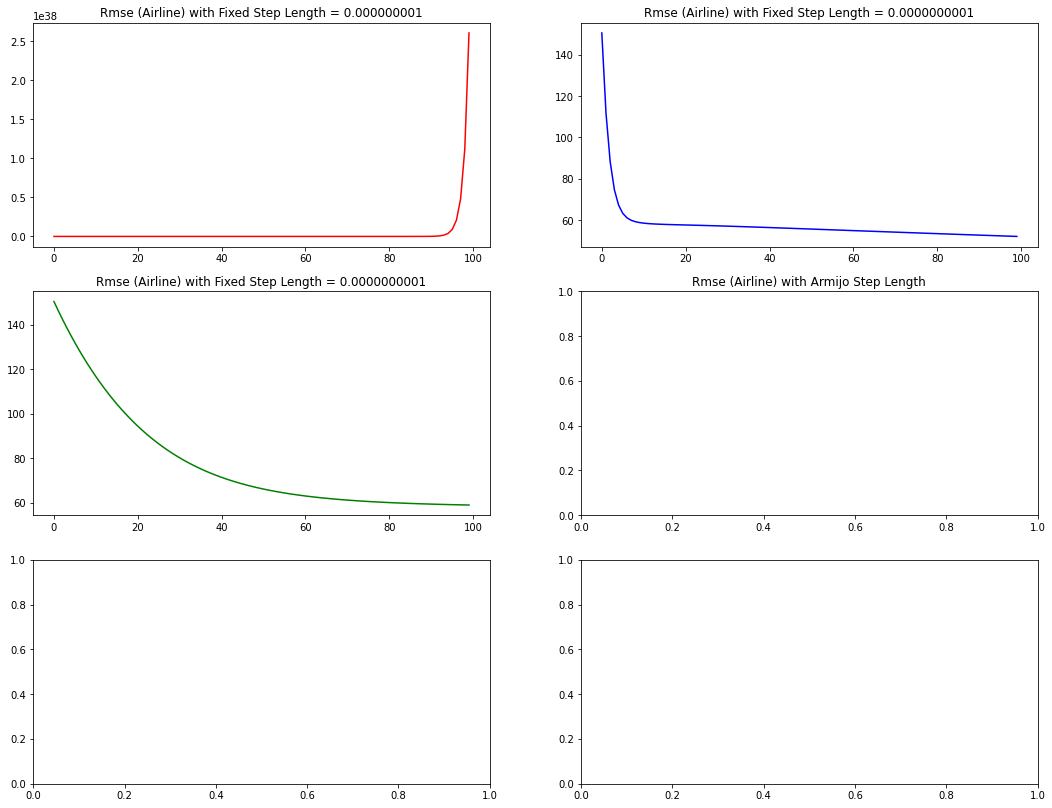

In [ ]:
fig2, axarr2= plt.subplots(3, 2)

axarr2[0,0].set_title("Rmse (Airline) with Fixed Step Length = 0.000000001")
axarr2[0,0].plot(np.arange(max_iter), rmse_variation_fixed_alpha_1, color="red")

axarr2[0,1].set_title("Rmse (Airline) with Fixed Step Length = 0.0000000001")
axarr2[0,1].plot(np.arange(max_iter), rmse_variation_fixed_alpha_2,color="blue")

axarr2[1,0].set_title("Rmse (Airline) with Fixed Step Length = 0.0000000001")
axarr2[1,0].plot(np.arange(max_iter), rmse_variation_fixed_alpha_3,color="green")

axarr2[1,1].set_title("Rmse (Airline) with Armijo Step Length")
axarr2[1,1].plot(np.arange(max_iter), rmse_variation_armijo,color="cyan")

axarr2[2,0].set_title("Rmse (Airline) with Bold Driver Step Length")
axarr2[2,0].plot(np.arange(max_iter), rmse_variation_bdriver,color="m")

axarr2[2,1].set_title("Rmse (Airline) of All Model")
axarr2[2,1].plot(np.arange(max_iter), rmse_variation_fixed_alpha_1,color="red")
axarr2[2,1].plot(np.arange(max_iter), rmse_variation_fixed_alpha_2,color="blue")
axarr2[2,1].plot(np.arange(max_iter), rmse_variation_fixed_alpha_3,color="green")
axarr2[2,1].plot(np.arange(max_iter), rmse_variation_armijo,color="cyan")
axarr2[2,1].plot(np.arange(max_iter), rmse_variation_bdriver,color="m")

plt.show()

## White wine dataset

In [ ]:
#split into train 80% and test 20%
wine_train, wine_test = split_train_test(white_wine_df,0.8)

#features x and target y
x_train_wine = wine_train.drop(["quality"],axis=1)
y_train_wine = wine_train["quality"]

x_test_wine = wine_test.drop(["quality"], axis=1)
y_test_wine = wine_test["quality"]

In [ ]:
#Gradient Descent with Fixed size step alpha_1
beta_fixed_alpha_1, obj_diff_fixed_alpha_1, rmse_variation_fixed_alpha_1 = LEARN_LINREG_GD(x_train_wine, y_train_wine,
                    x_test_wine, y_test_wine, alpha_1, max_iter, epsillon, 1)

Model did not converge after 100 iterations.


In [ ]:
#Gradient Descent with Fixed size step alpha_2
beta_fixed_alpha_2, obj_diff_fixed_alpha_2, rmse_variation_fixed_alpha_2 = LEARN_LINREG_GD(x_train_wine, y_train_wine,
                    x_test_wine, y_test_wine, alpha_2, max_iter, epsillon, 1)

Model did not converge after 100 iterations.


In [ ]:
#Gradient Descent with Fixed size step alpha_3
beta_fixed_alpha_3, obj_diff_fixed_alpha_3, rmse_variation_fixed_alpha_3 = LEARN_LINREG_GD(x_train_wine, y_train_wine,
                    x_test_wine, y_test_wine, alpha_3, max_iter, epsillon, 1)

Model did not converge after 100 iterations.


In [ ]:
#Gradient Descent with Armijo step
beta_armijo, obj_diff_armijo, rmse_variation_armijo = LEARN_LINREG_GD(x_train_wine, y_train_wine,
                    x_test_wine, y_test_wine, 1, max_iter, epsillon, 2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


TypeError: ignored

In [ ]:
#Gradient descent with Bold-driver step
beta_bdriver, obj_diff_bdriver, rmse_variation_bdriver = LEARN_LINREG_GD(x_train_wine, y_train_wine,
                    x_test_wine, y_test_wine, 1, max_iter, epsillon, 3)

Model converged in 2 iteration


#### Plots white wine loss

NameError: ignored

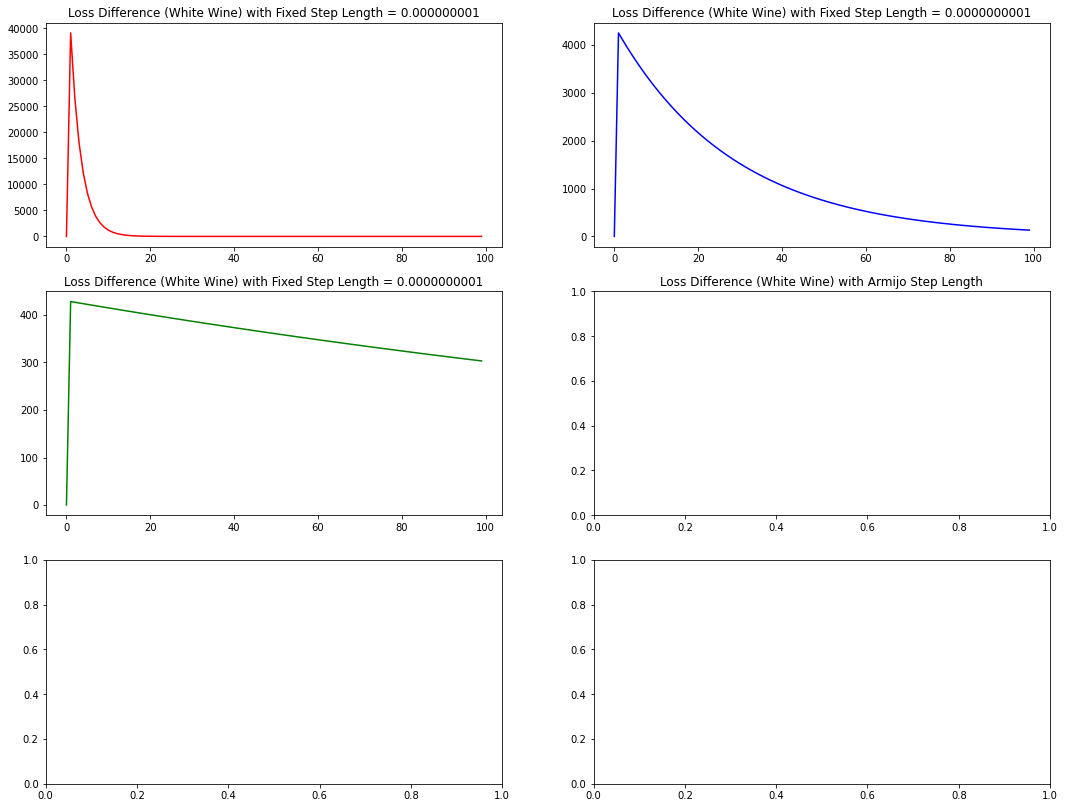

In [ ]:
fig, axarr= plt.subplots(3, 2)

axarr[0,0].set_title("Loss Difference (White Wine) with Fixed Step Length = 0.000000001")
axarr[0,0].plot(np.arange(max_iter), obj_diff_fixed_alpha_1, color="red")

axarr[0,1].set_title("Loss Difference (White Wine) with Fixed Step Length = 0.0000000001")
axarr[0,1].plot(np.arange(max_iter), obj_diff_fixed_alpha_2,color="blue")

axarr[1,0].set_title("Loss Difference (White Wine) with Fixed Step Length = 0.0000000001")
axarr[1,0].plot(np.arange(max_iter), obj_diff_fixed_alpha_3,color="green")

axarr[1,1].set_title("Loss Difference (White Wine) with Armijo Step Length")
axarr[1,1].plot(np.arange(2), obj_difference_armijo,color="cyan")

axarr[2,0].set_title("Loss Difference (White Wine) with Bold Driver Step Length")
axarr[2,0].plot(np.arange(3), obj_difference_bdriver,color="m")

axarr[2,1].set_title("Loss Difference (White Wine) of All Model")
axarr[2,1].plot(np.arange(max_iter), obj_diff_fixed_alpha_1,color="red")
axarr[2,1].plot(np.arange(max_iter), obj_diff_fixed_alpha_2,color="blue")
axarr[2,1].plot(np.arange(max_iter), obj_diff_fixed_alpha_3,color="green")
axarr[2,1].plot(np.arange(2), obj_diff_armijo, color="cyan")
axarr[2,1].plot(np.arange(3), obj_diff_bdriver, color="m")

plt.show()

### RSME white wine

NameError: ignored

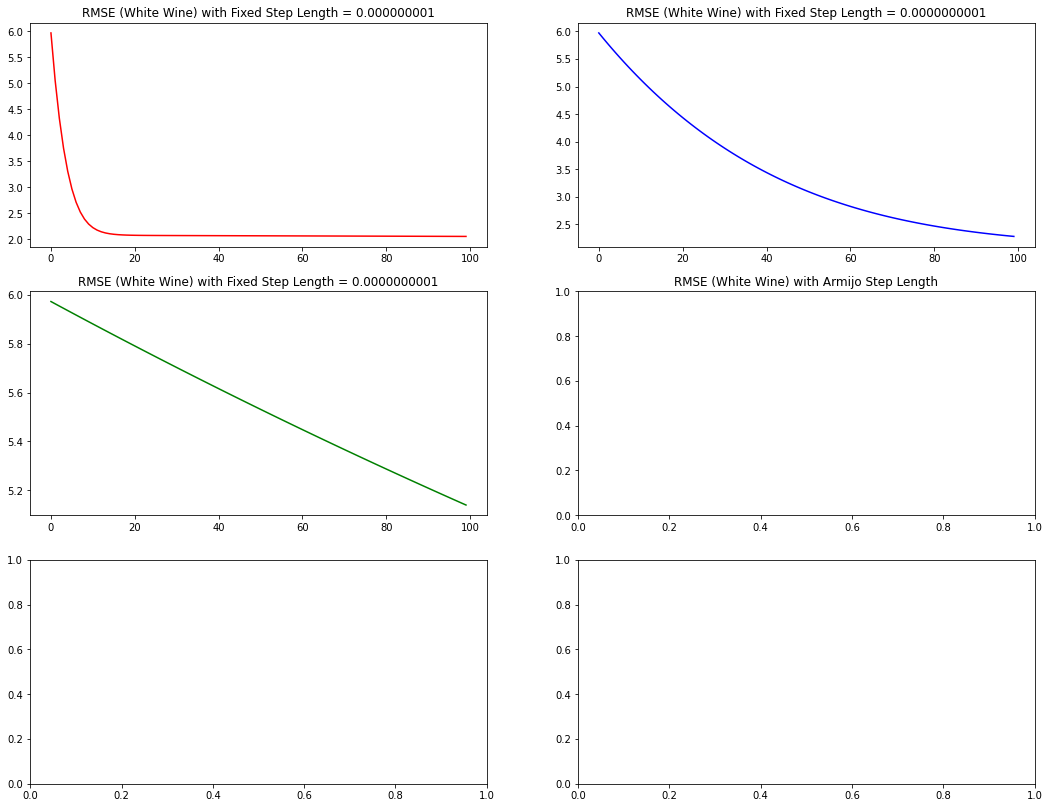

In [ ]:
fig2, axarr2= plt.subplots(3, 2)

axarr2[0,0].set_title("RMSE (White Wine) with Fixed Step Length = 0.000000001")
axarr2[0,0].plot(np.arange(max_iter), rmse_variation_fixed_alpha_1, color="red")

axarr2[0,1].set_title("RMSE (White Wine) with Fixed Step Length = 0.0000000001")
axarr2[0,1].plot(np.arange(max_iter), rmse_variation_fixed_alpha_2,color="blue")

axarr2[1,0].set_title("RMSE (White Wine) with Fixed Step Length = 0.0000000001")
axarr2[1,0].plot(np.arange(max_iter), rmse_variation_fixed_alpha_3,color="green")

axarr2[1,1].set_title("RMSE (White Wine) with Armijo Step Length")
axarr2[1,1].plot(np.arange(2), rmse_variation_armijo,color="cyan")

axarr2[2,0].set_title("RMSE (White Wine) with Bold Driver Step Length")
axarr2[2,0].plot(np.arange(3), rmse_variation_bdriver,color="m")

axarr2[2,1].set_title("RMSE (White Wine) of All Model")
axarr2[2,1].plot(np.arange(max_iter), rmse_variation_fixed_alpha_1,color="red")
axarr2[2,1].plot(np.arange(max_iter), rmse_variation_fixed_alpha_2,color="blue")
axarr2[2,1].plot(np.arange(max_iter), rmse_variation_fixed_alpha_3,color="green")
axarr2[2,1].plot(np.arange(2), rmse_variation_armijo,color="cyan")
axarr2[2,1].plot(np.arange(3), rmse_variation_bdriver,color="m")

plt.show()